# Data Structures: Vocab, Lexemes and StringStore

Now you have real experience using spaCy's objects it is time for you to learn more about what is actually going on unders spaCy's hood. In this chapter we are going to take a look to the shared vocabulary and how spaCy deal with strings.

## Shared vocab and string store (1)

- `Vocab`: stores data shared across multiple documents. SpaCy stores all shared data in the vocabulary, the `Vocab`, this includes words but the labels shemes for tags and entities.
- to save memory, spaCy encodes all strings to **hash values**.  
- Strings are only stored once in the `StringStore` via `nlp.vocab.strings`. If a word occurs more than ones, we don't need to save it every time. Instead, spaCy uses a hash function to generate an id and store the string only once in the string store. The string sotore is available at `nlp.vocab.strings`.
- String store: **lookup table** in both directions. it is a lookup table that works in both directions. You can lookup a string and get its hash and lookup the hash to get the string value:

```python
coffe_hash = nlp.vocab.strings['coffe']
coffe_string = nlp.vocab.strings[coffee_hash]
```
Internally spaCy only communicates in hash ids.

- Hashes ids can't reversed though - that's why we need to provide the shared vocab. If a word is not in the vocabuliarry, there is no way to get its string, that's because we always need to pass around the shared vocab. 

```python
# Raised an error if we haven't seen the stirng before
string = nlp.vocab.strings[3545435234543554545]
```

## Shared vocab and string store (2)

- Look up the string and hash in `nlp.vocab.strings`.

To get the hash for a string we can look it up in `nlp.vocab.strings` for the string

```python
doc = nlp("I love coffee")
print('hash value:', nlp.vocab.strings['cofee'])
``` 
output:
```
hash value: 3432408322302384023492
```

To get the string representation of a hash we can look up the hash

```python
doc = nlp("I love coffee")
print('string value:', nlp.vocab.strings[3432408322302384023492])
``` 
output:
```
string value: coffe
```

- A `doc` object also exposes its vocab and strings

```python
doc = nlp("I love coffee")
print('hash value:', nlp.vocab.strings['coffee'])
``` 
output:
```
hash value: 923043850458403583405
```


## Lexemes: entries in the vocabulary

Lexemes are context independent entrees in the vocabulary.

- A `Lexem` object is an entry in the vocabulary. You can get a Lexeme by looking up a string or a hash id in the `Vocab`.  


```python
doc = nlp("I love coffe")
lexeme = nlp.vocab['coffe']
```
Lexemes expose attributes just like tokens:

```python
# print the lexical attributes
print(lexeme.text, lexeme.orth, lexeme.is_alpha)
```
output
```
coffee 41034830430248034813240 True
```

- Lexemes hold **context-independent** information about a word like the text or whether the word consiste of alphanumeric characters:
    - Word text: `lexeme.text` and `lexeme.orth` (the hash)
    - Lexical attributes like `lexeme.is_alpha`
    - **Not** context-dependent part-of-speech tags, dependencies or entity labels. Lexims don't have part-of-speech tagos or entity labels those depend on the context. Here it is an example

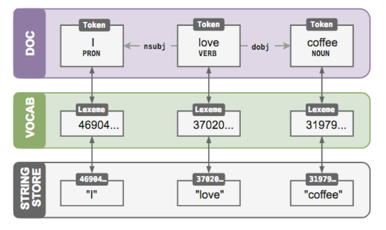

In [4]:
from IPython.display import display, Image
display(Image(filename='imgs/lexim-01.png'))

The `Doc` contains words in context. In this case the tokens `I`, `love` and `coffe` with their part-of-speech tag and dependencies. 

Each token refers to a lexeme which knows the word's hash id. 

To get the string representation of the word spaCy looks at the hash in the sting store.

This sounds a beat abstract. Let's see some examles.

## Strings to hashes
The `nlp` object has already been created for you.

- Look up the string "cat" in `nlp.vocab.strings` to get the hash.
- Look up the hash to get back the string.

In [26]:
import spacy

In [27]:
# Load a model and create the nlp object
nlp = spacy.load('en_core_web_sm')

In [28]:
# Look up the hash for the word "cat"
cat_hash = nlp.vocab.strings['cat']
print(cat_hash)

# Look up the cat_hash to get the string
cat_string = nlp.vocab.strings[5439657043933447811]
print(cat_string)

5439657043933447811
cat


- Look up the string label "PERSON" in n`lp.vocab.strings` to get the hash.
- Look up the hash to get back the string.

In [29]:
# Look up the hash for the string label "PERSON"
person_hash = nlp.vocab.strings['PERSON']
print(person_hash)

# Look up the person_hash to get the string
person_string = nlp.vocab.strings[378]
print(person_string)

378
PERSON


## Vocab, hashes and lexemes
Why does this code throw an error?

```python
from spacy.lang.en import English
from spacy.lang.de import German

# Create an English and German nlp object
nlp = English()
nlp_de = German()

# Get the ID for the string 'Bowie'
bowie_id = nlp.vocab.strings['Bowie']
print(bowie_id)

# Look up the ID for 'Bowie' in the vocab
print(nlp_de.vocab.strings[bowie_id])
```

The `English` language class is already available as the `nlp` object.

In [30]:
from spacy.lang.en import English
from spacy.lang.de import German

# Create an English and German nlp object
nlp = English()
nlp_de = German()

In [31]:
# Get the ID for the string 'Bowie'
bowie_id = nlp.vocab.strings['Bowie']
print(bowie_id)

2644858412616767388


In [32]:
# Look up the ID for 'Bowie' in the vocab
print(nlp_de.vocab.strings[bowie_id])

KeyError: "[E018] Can't retrieve string for hash '2644858412616767388'."

The string `Bowie` isn't present in the German vocab, so the hash can't be resolved in the string store.

[Reference](https://spacy.io/usage/spacy-101#vocab)